In [260]:
#import revalant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot 
plt.rcParams["figure.figsize"] = (13,13) # to set the default height and width of all plots in this notebook
plt.style.use('ggplot') # to use R's ggplot style for visuals


In [261]:
df = pd.read_excel(r'Certified Seed Data for Pythone Project.xlsx')
df.head()

,Year,Zone,Season,Category,Crop,Production (mt),Ha,yield/ha,State,Class,Remarks
0,2009,South East,Wet,CBOs,Rice,3.0,1.0,3.0,Abia,Certified,Pass
1,2009,South East,Wet,CBOs,Rice,18.0,6.0,3.0,Abia,Certified,Pass
2,2009,South East,Wet,CBOs,Rice,12.0,4.0,3.0,Abia,Certified,Pass
3,2009,South South,Wet,CBOs,Rice,1.5,0.5,3.0,Akwa Ibom,Certified,Pass
4,2009,South South,Wet,CBOs,Rice,2.1,0.7,3.0,Akwa Ibom,Certified,Pass


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39208 entries, 0 to 39207
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             39208 non-null  int64  
 1   Zone             39208 non-null  object 
 2   Season           39208 non-null  object 
 3   Category         39208 non-null  object 
 4   Crop             39208 non-null  object 
 5   Production (mt)  39208 non-null  float64
 6   Ha               39208 non-null  float64
 7   yield/ha         39208 non-null  float64
 8   State            39208 non-null  object 
 9   Class            39208 non-null  object 
 10  Remarks          39208 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 3.3+ MB


##### The data has 11 features and 39k+ observations. 
#### 7 of the features are categorical data, 3 features are floats and one of the features is a year data type

In [92]:
df.isna().sum()

Year               0
Zone               0
Season             0
Category           0
Crop               0
Production (mt)    0
Ha                 0
yield/ha           0
State              0
Class              0
Remarks            0
dtype: int64

There are no missing values in the data

In [258]:
# Checks for unique values in the year column
df.Year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [93]:
df.describe().astype(int)

,Year,Production (mt),Ha,yield/ha
count,39208,39208,39208,39208
mean,2013,198,5,2
std,1,25932,51,19
min,2009,0,0,0
25%,2013,3,2,1
50%,2014,6,3,3
75%,2014,17,7,3
max,2015,5056200,9224,3180


In [277]:
# Find row where area = 9224
df[df.loc[:,'Ha'] == 9224]


,Year,Zone,Season,Category,Crop,Production (mt),Ha,yield/ha,State,Class,Remarks
30013,2012,North West,Wet,Companies,Cotton,11991.2,9224.0,1.3,Katsina,Certified,Pass


In [278]:
#Find row where production = 5056200
df[df.loc[:,'Production (mt)'] == 5056200]

,Year,Zone,Season,Category,Crop,Production (mt),Ha,yield/ha,State,Class,Remarks
16747,2012,North West,Wet,Companies,Maize,5056200.0,1590.0,3.0,Kaduna,Certified,Pass


# Cleaning the data

In [263]:
# For y/ha: replace any value > 3 with 3 
df['yield/ha'].values[df['yield/ha' ]> 3] = 3 


In [264]:
# Create a new production variable by multiplying area and yield 
df['Production'] = df['yield/ha'] * df['Ha']
df.describe().astype(int)

,Year,Production (mt),Ha,yield/ha,Production
count,39208,39208,39208,39208,39208
mean,2013,198,5,2,14
std,1,25932,51,0,85
min,2009,0,0,0,0
25%,2013,3,2,1,3
50%,2014,6,3,3,6
75%,2014,17,7,3,15
max,2015,5056200,9224,3,11991


In [265]:
print('Total Production from 2009 to 2015:',df['Production'].sum())

Total Production from 2009 to 2015: 570731.2579


In [266]:
# Drop irrlevant variables from the data
df.drop(['Production (mt)', 'Class', 'Remarks'], axis = 1, inplace = True)

In [267]:
df.describe().astype(int)

,Year,Ha,yield/ha,Production
count,39208,39208,39208,39208
mean,2013,5,2,14
std,1,51,0,85
min,2009,0,0,0
25%,2013,2,1,3
50%,2014,3,3,6
75%,2014,7,3,15
max,2015,9224,3,11991


# Univariate Analysis

Year
2009     14310
2010     10910
2011     24590
2012     48651
2013    147361
2014    203589
2015    121317
Name: Production, dtype: int32

<AxesSubplot:xlabel='Year'>

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

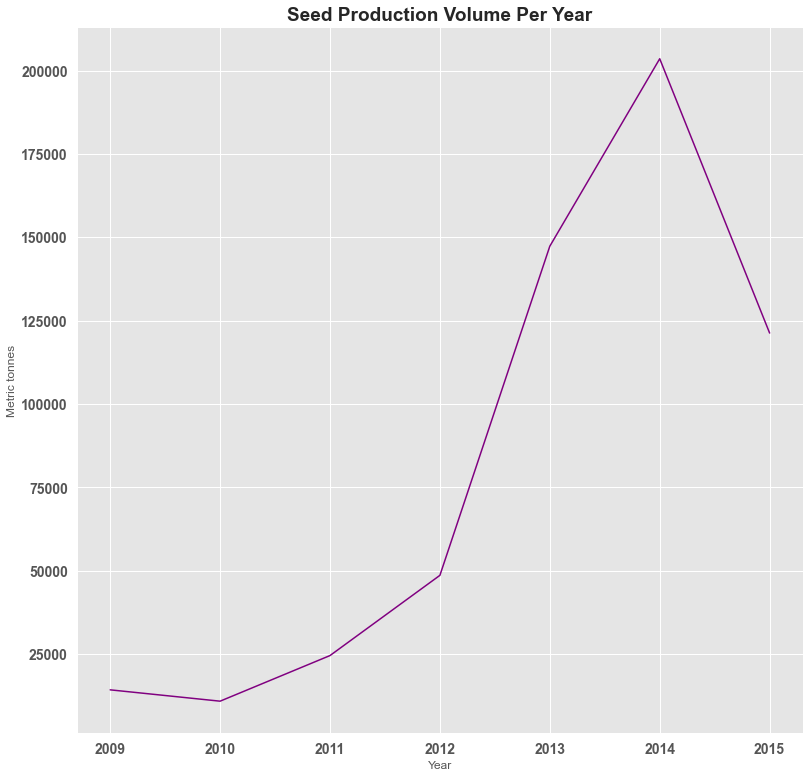

In [254]:
# What was the yearly production of certified seeds?
display(df.groupby('Year')['Production'].sum().astype(int))

# Plot the answer
display(df.groupby('Year')['Production'].sum().astype(int).plot.line(color ='purple'))

plt.xticks(rotation = 0, fontweight = 'bold', fontsize =14)
plt.title('Seed Production Volume Per Year', fontsize = 19, fontweight = 'bold')
plt.ylabel('Metric tonnes')
plt.yticks(fontweight = 'bold',fontsize =14)


Crop
Cotton      48358
Maize      244407
Rice       261758
Sorghum      6295
Soybean      9910
Name: Production, dtype: int32

Text(0, 0.5, 'Metric tonnes')

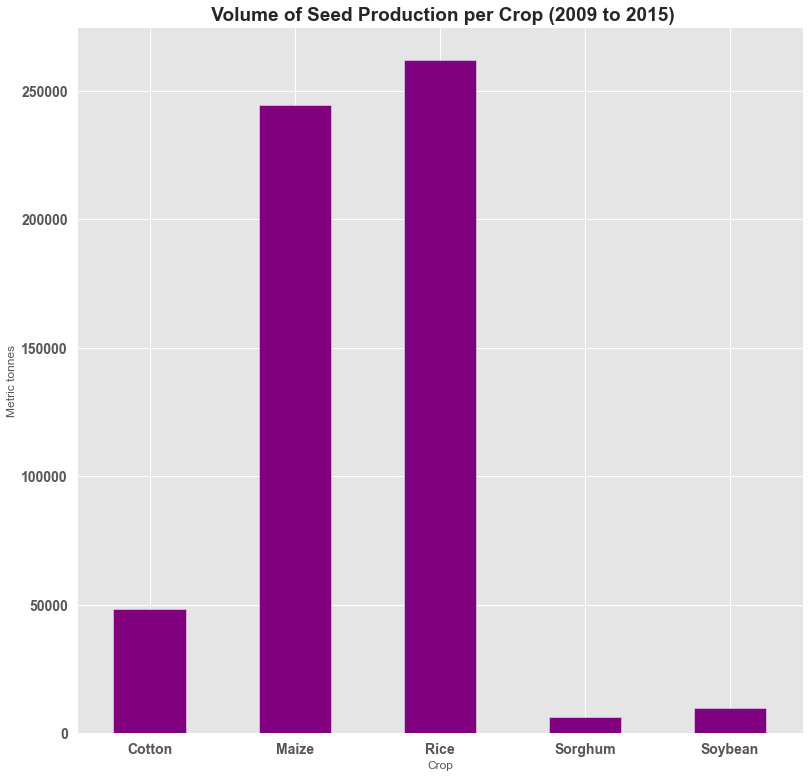

In [255]:
# Calculate seed production volume by crop
display(df.groupby('Crop')['Production'].sum().astype(int))

#Plot the data
df.groupby('Crop')['Production'].sum().astype(int).plot.bar(color ='purple')
plt.title(' Volume of Seed Production per Crop (2009 to 2015)',  fontsize = 19, fontweight = 'bold')
plt.xticks(rotation = 0, fontweight = 'bold',fontsize =14)
plt.yticks(fontweight = 'bold',fontsize =14)
plt.ylabel('Metric tonnes')

In [362]:
# Total seed production  in metric tonne by: year, season and crop
df.groupby(['Year',  'Season', 'Crop',])['Production'].sum().astype(int)

Year  Season  Crop   
2009  Wet     Cotton        25
              Maize      10238
              Rice        2928
              Sorghum      661
              Soybean      456
2010  Wet     Cotton       299
              Maize       6820
              Rice        3259
              Sorghum      245
              Soybean      286
2011  Wet     Cotton      5951
              Maize      11015
              Rice        6751
              Sorghum      302
              Soybean      568
2012  Wet     Cotton     12119
              Maize      18537
              Rice       15859
              Sorghum      465
              Soybean     1669
2013  Wet     Cotton     13188
              Maize      57383
              Rice       72124
              Sorghum     1387
              Soybean     3277
2014  Dry     Maize       3073
              Rice       25498
              Sorghum       65
              Soybean       95
      Wet     Cotton     15992
              Maize      89508
              Ric

In [361]:
# Seed Production in metric tonne per year by crop
df.groupby(['Year', 'Crop'])['Production'].sum().astype(int)

Year  Crop   
2009  Cotton        25
      Maize      10238
      Rice        2928
      Sorghum      661
      Soybean      456
2010  Cotton       299
      Maize       6820
      Rice        3259
      Sorghum      245
      Soybean      286
2011  Cotton      5951
      Maize      11015
      Rice        6751
      Sorghum      302
      Soybean      568
2012  Cotton     12119
      Maize      18537
      Rice       15859
      Sorghum      465
      Soybean     1669
2013  Cotton     13188
      Maize      57383
      Rice       72124
      Sorghum     1387
      Soybean     3277
2014  Cotton     15992
      Maize      92581
      Rice       91039
      Sorghum     1946
      Soybean     2028
2015  Cotton       781
      Maize      47830
      Rice       69795
      Sorghum     1286
      Soybean     1623
Name: Production, dtype: int32

In [333]:
# Create a pivot table of Seed production  in metric tonne for each crop for the years in the table. It produces the same result as the same as the code above.  
pd.pivot_table(values = 'Production', index = 'Year', columns = 'Crop', data = df,aggfunc=np.sum).astype(int)

Crop,Cotton,Maize,Rice,Sorghum,Soybean
Year,,,,,
2009,25,10238,2928,661,456
2010,299,6820,3259,245,286
2011,5951,11015,6751,302,568
2012,12119,18537,15859,465,1669
2013,13188,57383,72124,1387,3277
2014,15992,92581,91039,1946,2028
2015,781,47830,69795,1286,1623


Text(0, 0.5, '(In Metric Tonne)')

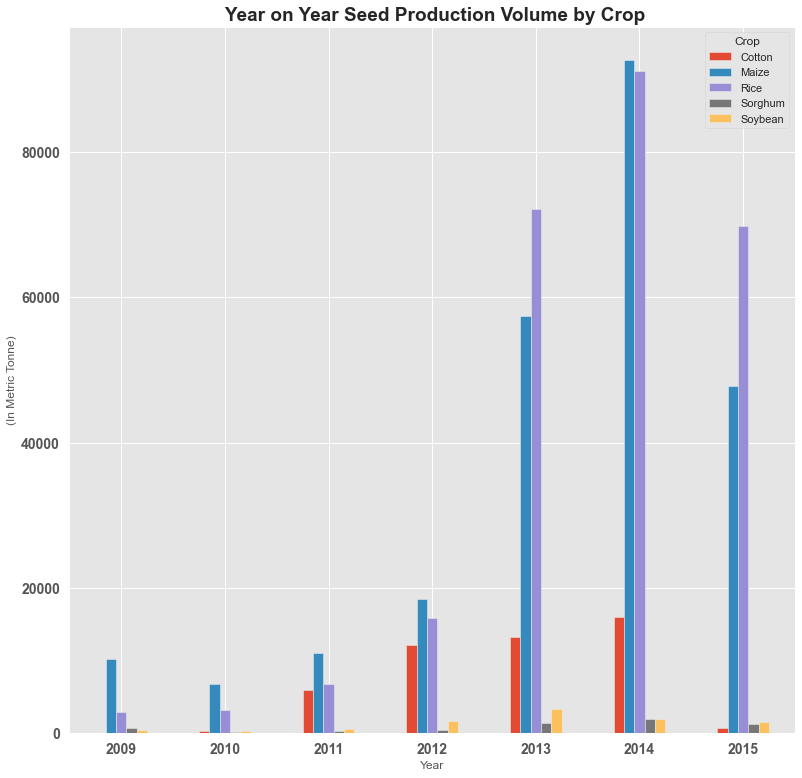

In [256]:
pd.pivot_table(values = 'Production', index = 'Year', columns = 'Crop', data = df,aggfunc=np.sum).astype(int).plot.bar()

#Plot the data
plt.title(' Year on Year Seed Production Volume by Crop', fontsize = 19, fontweight = 'bold')
plt.xticks(rotation = 0, fontweight = 'bold',fontsize =14)
plt.yticks( fontweight = 'bold',fontsize =14)
plt.ylabel('(In Metric Tonne)')

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

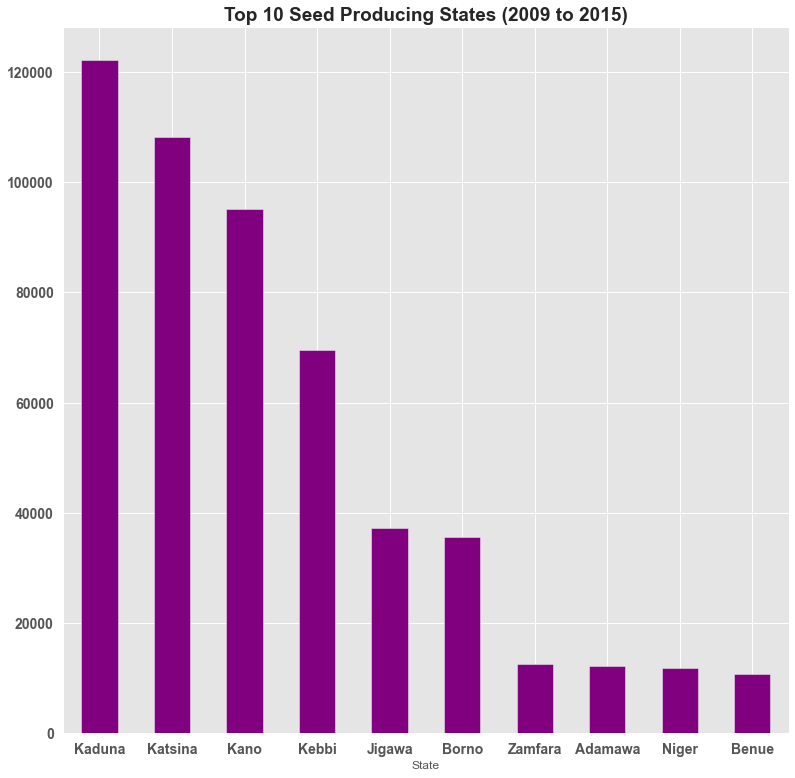

In [268]:
# Calculate seed production volumes by top 10 states and save it ina variable called Top_10_states
Top_10_states = df.groupby('State')['Production'].sum().astype(int).sort_values(ascending=False)[:10]

# Plot Top_10_states
Top_10_states.plot.bar(color = 'purple')
plt.title('Top 10 Seed Producing States (2009 to 2015)', fontweight = 'bold',fontsize =19)
plt.xticks(rotation =0,fontweight = 'bold',fontsize =14)
plt.yticks(fontweight = 'bold',fontsize =14)


In [271]:
# What is the total volume of production by the top 10 states?
print(Top_10_states.sum(), 'Metric tonnes')

514894 Metric tonnes


,Production
Zone,
North Central,15
North East,16
North West,14
South East,7
South South,11
South West,14


Text(0.5, 1.0, 'Zonal Volume of Seed Production in % (2009 to 2015)')

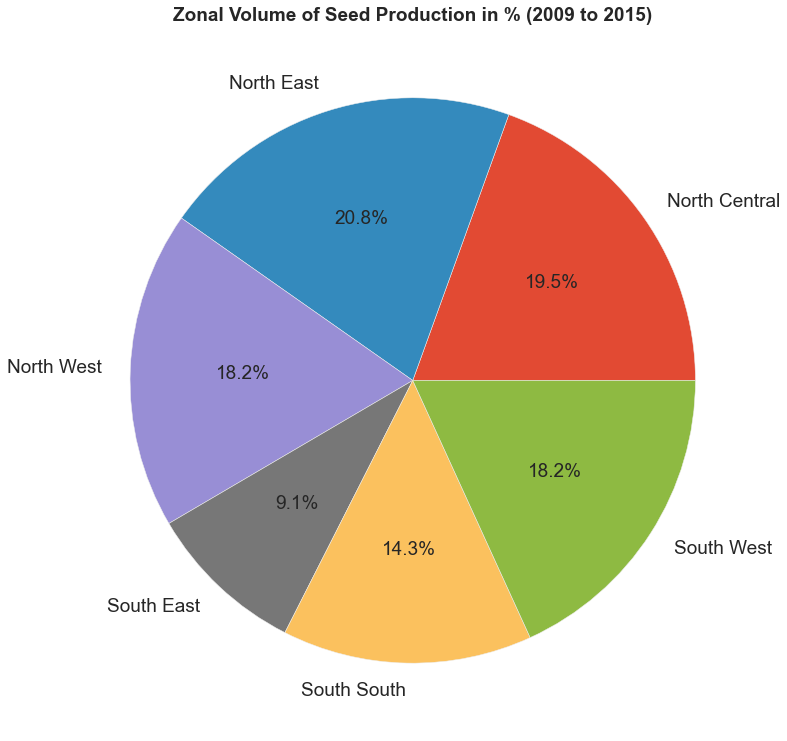

In [248]:
# Calculate production by zone and assign it to v
v=df[['Zone', 'Production']].groupby(['Zone']).mean().astype(int)
display(v)
v.reset_index(level=['Zone'],inplace=True) # to set the zones and indexes

plt.pie(v['Production'], labels = v['Zone'], autopct='%1.1f%%', textprops={'fontsize': 19})
plt.title('Zonal Volume of Seed Production in % (2009 to 2015)', fontweight = 'bold',fontsize =19)

Text(0.5, 1.0, 'Average Seed Production by Industry Players (in metric tonnes)')

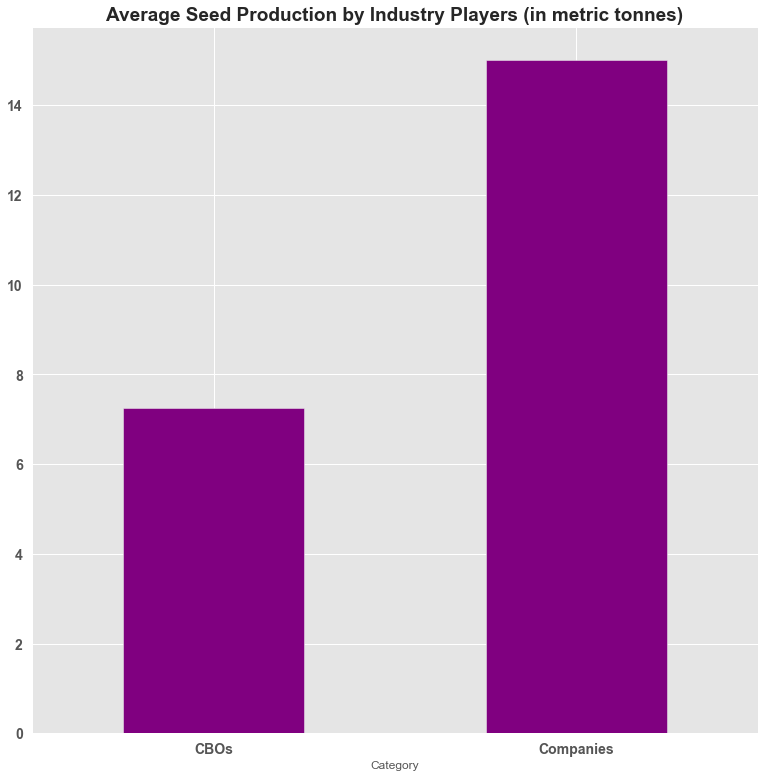

In [253]:
# Calculate average total seed production by Category
df.groupby('Category')['Production'].mean()

# Plot the data 
df.groupby('Category')['Production'].mean().plot.bar(color = 'purple')
plt.xticks(rotation =0,fontweight = 'bold',fontsize =14)
plt.yticks(fontweight = 'bold',fontsize =14)
plt.title('Average Seed Production by Industry Players (in metric tonnes)', fontsize = 19, fontweight = 'bold')